In [2]:
!pip install scikit-learn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from sklearn.model_selection import train_test_split

  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/8.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.9 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.9 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.9 MB 1.2 MB/s eta 0:00:07
   --- ------------------------------------ 0.8/8.9 MB 1.2 MB/s eta 0:00:07
   ---- ----------------------------------- 1.0/8.9 MB 1.3 MB/s eta 0:00:07
   ------- -------------------------------- 1.6/8.9 MB 1.4 MB/s eta 0:00:06
   -------- ------------------------------- 1.8/8.9 MB 1.5 MB/s eta 0:00:05
   ---------- ----------------------------- 2.4/8.9 MB 1.5 MB/s eta 0:00:05
   ------------ --------------------------- 2.9/8.9 MB 1.7 MB/s eta 0:00:04
   ---------------- ----------------------- 3.7/8.9 MB 1.9 MB/s eta 0:00:03
   ---------------------- ----------------- 5.0/8.9 MB 2.3 MB/s eta 0:00:02
   ----------------------------- -------

In [5]:
dataframe = pd.read_csv('C:/Users/yashr/OneDrive/Desktop/DeepLearning/TSLA.csv')  # Ensure the dataset has 'Date' and 'Close' columns
dataframe['Date'] = pd.to_datetime(dataframe['Date'])
dataframe.set_index('Date', inplace=True)

In [6]:
closing_prices = dataframe[['Close']].values
scaler_obj = MinMaxScaler(feature_range=(0, 1))
normalized_data = scaler_obj.fit_transform(closing_prices)

In [7]:
def generate_sequences(data, seq_len):
    X_seq, y_seq = [], []
    for idx in range(len(data) - seq_len):
        X_seq.append(data[idx:idx + seq_len])
        y_seq.append(data[idx + seq_len])
    return np.array(X_seq), np.array(y_seq)

sequence_len = 60  # You can modify the sequence length as needed
X_features, y_labels = generate_sequences(normalized_data, sequence_len)

In [8]:
train_test_split_idx = int(len(X_features) * 0.8)
X_train_data, y_train_data = X_features[:train_test_split_idx], y_labels[:train_test_split_idx]
X_test_data, y_test_data = X_features[train_test_split_idx:], y_labels[train_test_split_idx:]

In [9]:
rnn_model = Sequential()
rnn_model.add(SimpleRNN(units=50, activation='relu', input_shape=(sequence_len, 1)))
rnn_model.add(Dense(1))  # Output layer for predicting the stock price

rnn_model.compile(optimizer='adam', loss='mean_squared_error')

e:\Machine Learning\venv\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
training_history = rnn_model.fit(X_train_data, y_train_data, epochs=10, batch_size=32, validation_data=(X_test_data, y_test_data))

Epoch 1/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 2.2543e-04 - val_loss: 0.0753
Epoch 2/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.9061e-06 - val_loss: 0.0734
Epoch 3/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.4817e-06 - val_loss: 0.0712
Epoch 4/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.4517e-06 - val_loss: 0.0706
Epoch 5/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.6078e-06 - val_loss: 0.0697
Epoch 6/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.3881e-06 - val_loss: 0.0683
Epoch 7/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.5541e-06 - val_loss: 0.0681
Epoch 8/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.4261e-06 - val_loss: 0.0661
Epoch 9/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.7371e-06 - val_loss: 0.0650
Epoch 10/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.4623e-06 - val_loss: 0.0646


In [11]:
future_predictions = []
recent_sequence = normalized_data[train_test_split_idx - sequence_len:train_test_split_idx]

for _ in range(20):  # Predict for the next 20 days
    recent_sequence = np.reshape(recent_sequence, (1, sequence_len, 1))  # Ensure correct shape for RNN
    predicted_price = rnn_model.predict(recent_sequence)

    future_predictions.append(predicted_price[0][0])  # Store predicted price

    # Reshape predicted price and append it to the sequence
    predicted_price = np.reshape(predicted_price, (1, 1, 1))
    recent_sequence = np.append(recent_sequence[:, 1:, :], predicted_price, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


In [12]:
predicted_future_prices = scaler_obj.inverse_transform(np.array(future_predictions).reshape(-1, 1))

In [13]:
actual_future_prices = scaler_obj.inverse_transform(normalized_data[train_test_split_idx:train_test_split_idx+20])

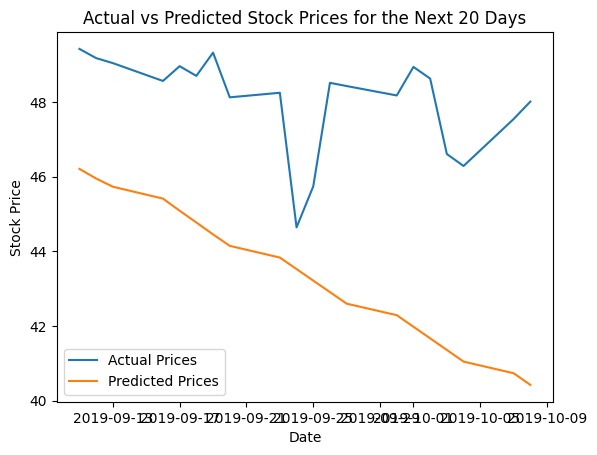

In [14]:
plt.plot(dataframe.index[train_test_split_idx:train_test_split_idx+20], actual_future_prices, label='Actual Prices')
plt.plot(dataframe.index[train_test_split_idx:train_test_split_idx+20], predicted_future_prices, label='Predicted Prices')
plt.title('Actual vs Predicted Stock Prices for the Next 20 Days')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [15]:
for day in range(20):
    print(f"Day {day+1}: Actual: {actual_future_prices[day][0]}, Predicted: {predicted_future_prices[day][0]}")

Day 1: Actual: 49.41999799999999, Predicted: 46.20772171020508
Day 2: Actual: 49.17400000000001, Predicted: 45.94929504394531
Day 3: Actual: 49.040001, Predicted: 45.73096466064453
Day 4: Actual: 48.562, Predicted: 45.4123420715332
Day 5: Actual: 48.958, Predicted: 45.08803176879883
Day 6: Actual: 48.698001999999995, Predicted: 44.77333068847656
Day 7: Actual: 49.32, Predicted: 44.45419692993164
Day 8: Actual: 48.124001, Predicted: 44.14778518676758
Day 9: Actual: 48.245998, Predicted: 43.83405685424805
Day 10: Actual: 44.641998, Predicted: 43.52634811401367
Day 11: Actual: 45.740002, Predicted: 43.21685791015625
Day 12: Actual: 48.512001, Predicted: 42.90950012207031
Day 13: Actual: 48.425999, Predicted: 42.600284576416016
Day 14: Actual: 48.17399999999999, Predicted: 42.291629791259766
Day 15: Actual: 48.938, Predicted: 41.98176193237305
Day 16: Actual: 48.625999, Predicted: 41.67151641845703
Day 17: Actual: 46.605999, Predicted: 41.360679626464844
Day 18: Actual: 46.285999, Predicte